Problem Statement:

Yulu, India's premier micro-mobility service provider, has been experiencing notable declines in revenue. To address this challenge, the company has engaged a consulting firm to analyze the factors influencing the demand for their shared electric cycles within the Indian market. The aim is to identify significant variables that predict demand and assess how effectively these variables explain fluctuations in demand.

Key Objectives:

1. Identify Significant Variables: Determine the key factors that impact the demand for shared electric cycles in India. This analysis will encompass various socio-economic, geographical, and behavioral factors.

2. Assess Predictive Power: Evaluate the effectiveness of the identified variables in predicting demand fluctuations accurately. Understanding the predictive power will aid in refining marketing strategies and operational decisions.

3. Provide Insights for Strategy Formulation: Utilize the findings to formulate data-driven strategies aimed at revitalizing revenue growth and enhancing Yulu's market position in India's micro-mobility sector.

By addressing these objectives, Yulu aims to gain comprehensive insights into the dynamics of shared electric cycle demand in India, thereby enabling targeted interventions to drive business growth and sustainability.







In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, chi2_contingency, levene, shapiro
from statsmodels.formula.api import ols
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [89]:
data = pd.read_csv("/content/bike_sharing.csv")
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# 1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

In [90]:
print("Data Types of Each Column:")
print(data.dtypes)

Data Types of Each Column:
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


In [91]:
num_rows, num_cols = data.shape
print("\nNumber of Rows:", num_rows)
print("Number of Columns:", num_cols)


Number of Rows: 10886
Number of Columns: 12


In [92]:
missing_values = data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [93]:
data.describe(include="all")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [94]:
# Identify duplicate records
duplicate_rows = data[data.duplicated()]

# Display duplicate rows
print("Duplicate Records:")
print(duplicate_rows)

# Remove duplicate records
# data = data.drop_duplicates()

# Confirm removal of duplicate records
print("\nAfter removing duplicates:")
# print(data.shape)  # Display the shape of the DataFrame to confirm duplicates are removed


Duplicate Records:
Empty DataFrame
Columns: [datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, count]
Index: []

After removing duplicates:


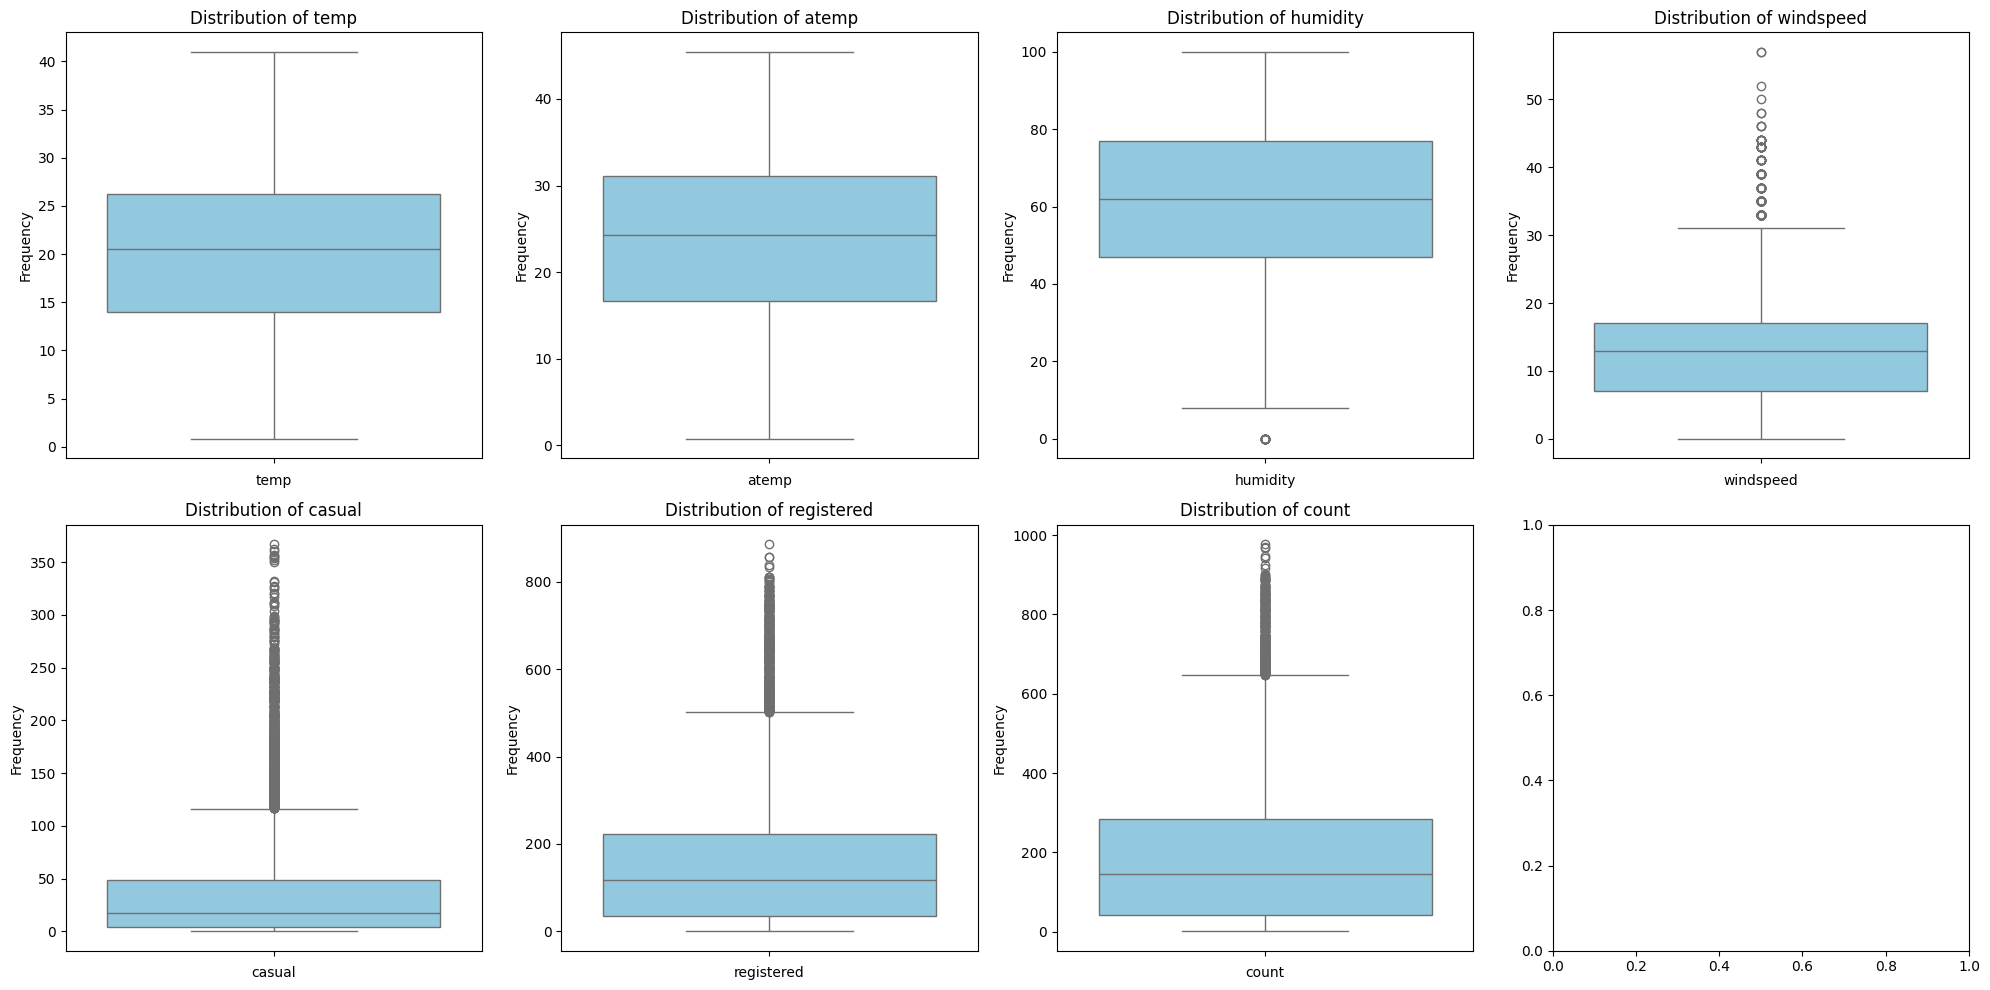

In [95]:
# Continuous Variables
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Set up subplots for continuous variables
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Plot continuous variables
for i, var in enumerate(continuous_vars):
    row = i // 4
    col = i % 4
    sns.boxplot(data[var], color='skyblue', ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



In [96]:
# Calculate IQR for each numerical column
print("\nBefore removing outliers:")
print(data.shape)
Q1 = data[continuous_vars].quantile(0.25)
Q3 = data[continuous_vars].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data[continuous_vars] < (Q1 - 1.5 * IQR)) | (data[continuous_vars] > (Q3 + 1.5 * IQR))).any(axis=1)

# Count the number of outliers
num_outliers = outliers.sum()
print("Number of outliers:", num_outliers)

# Remove outliers
df_no_outliers = data[~outliers]

# Confirm removal of outliers
print("\nAfter removing outliers:")
print(df_no_outliers.shape)


Before removing outliers:
(10886, 12)
Number of outliers: 1368

After removing outliers:
(9518, 12)


# Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

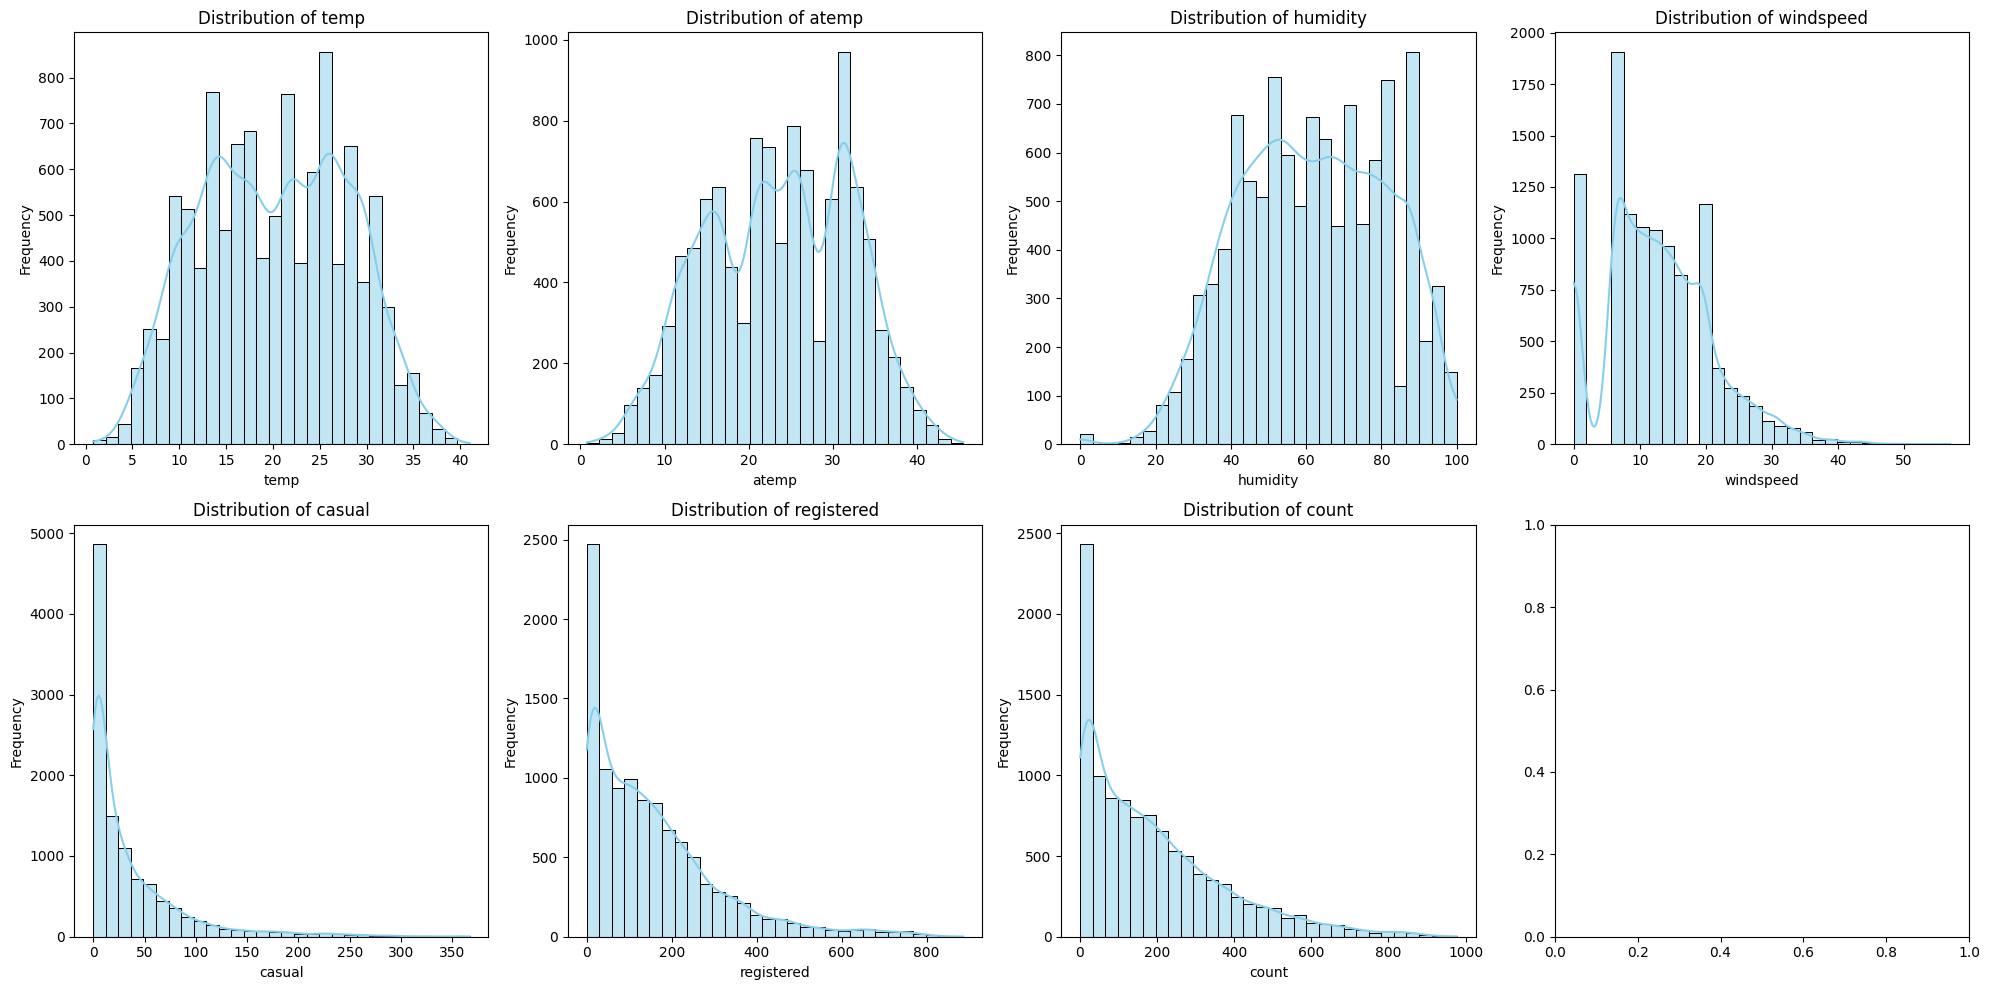

In [97]:
# Continuous Variables
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Set up subplots for continuous variables
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Plot continuous variables
for i, var in enumerate(continuous_vars):
    row = i // 4
    col = i % 4
    sns.histplot(data[var], kde=True, bins=30, color='skyblue', ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



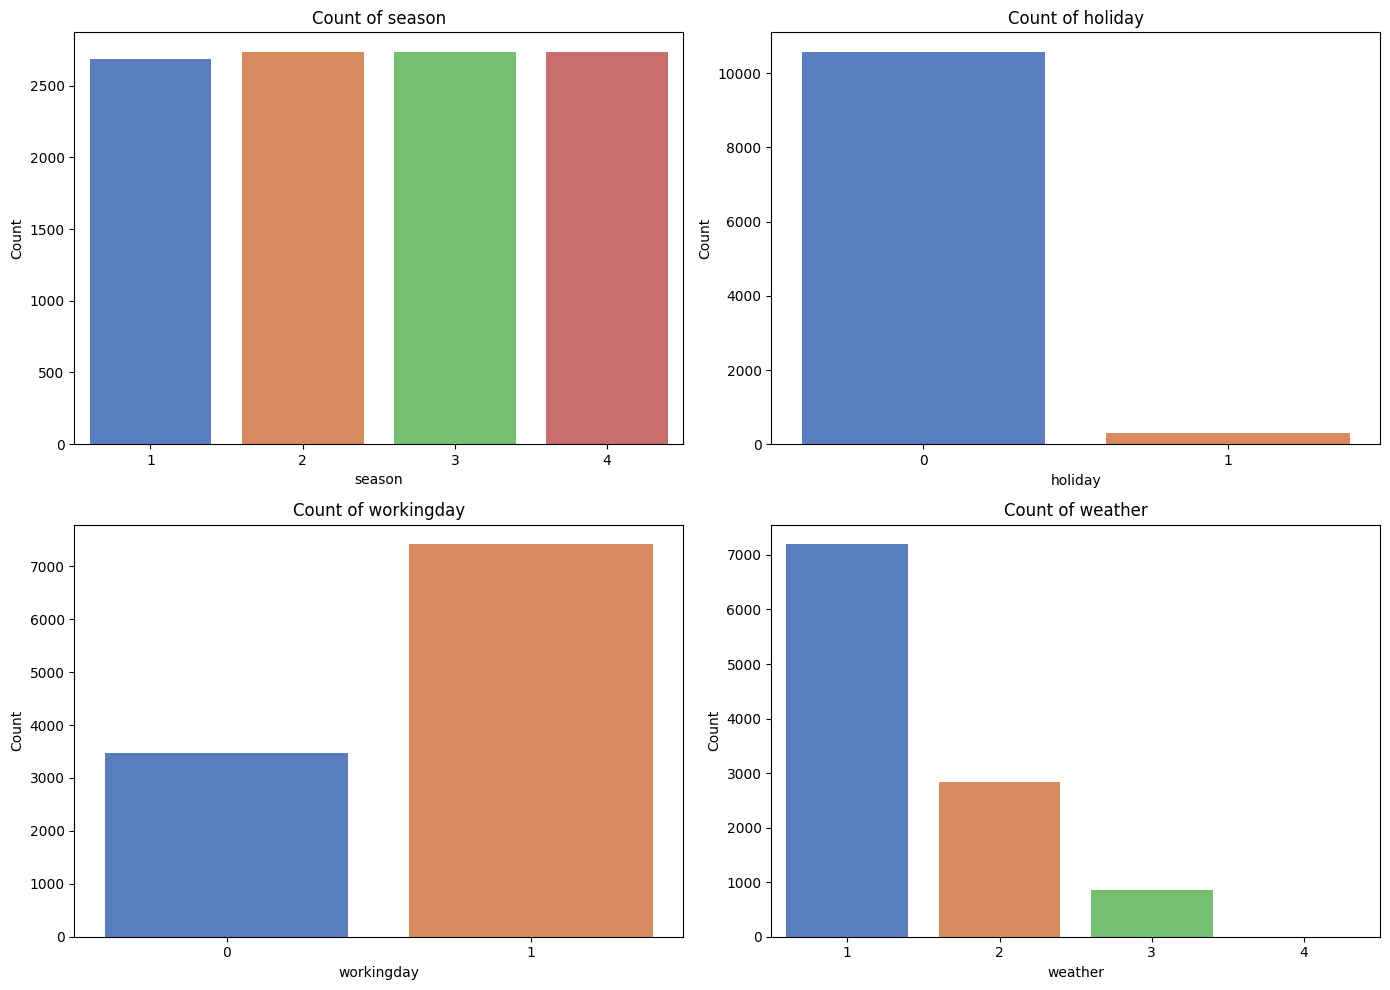

In [98]:
# Categorical Variables
categorical_vars = ['season', 'holiday', 'workingday', 'weather']

# Set up subplots for categorical variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot categorical variables
for i, var in enumerate(categorical_vars):
    row = i // 2
    col = i % 2
    sns.countplot(x=var, data=data, palette='muted', ax=axes[row, col])
    axes[row, col].set_title(f'Count of {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Count')

plt.tight_layout()
plt.show()

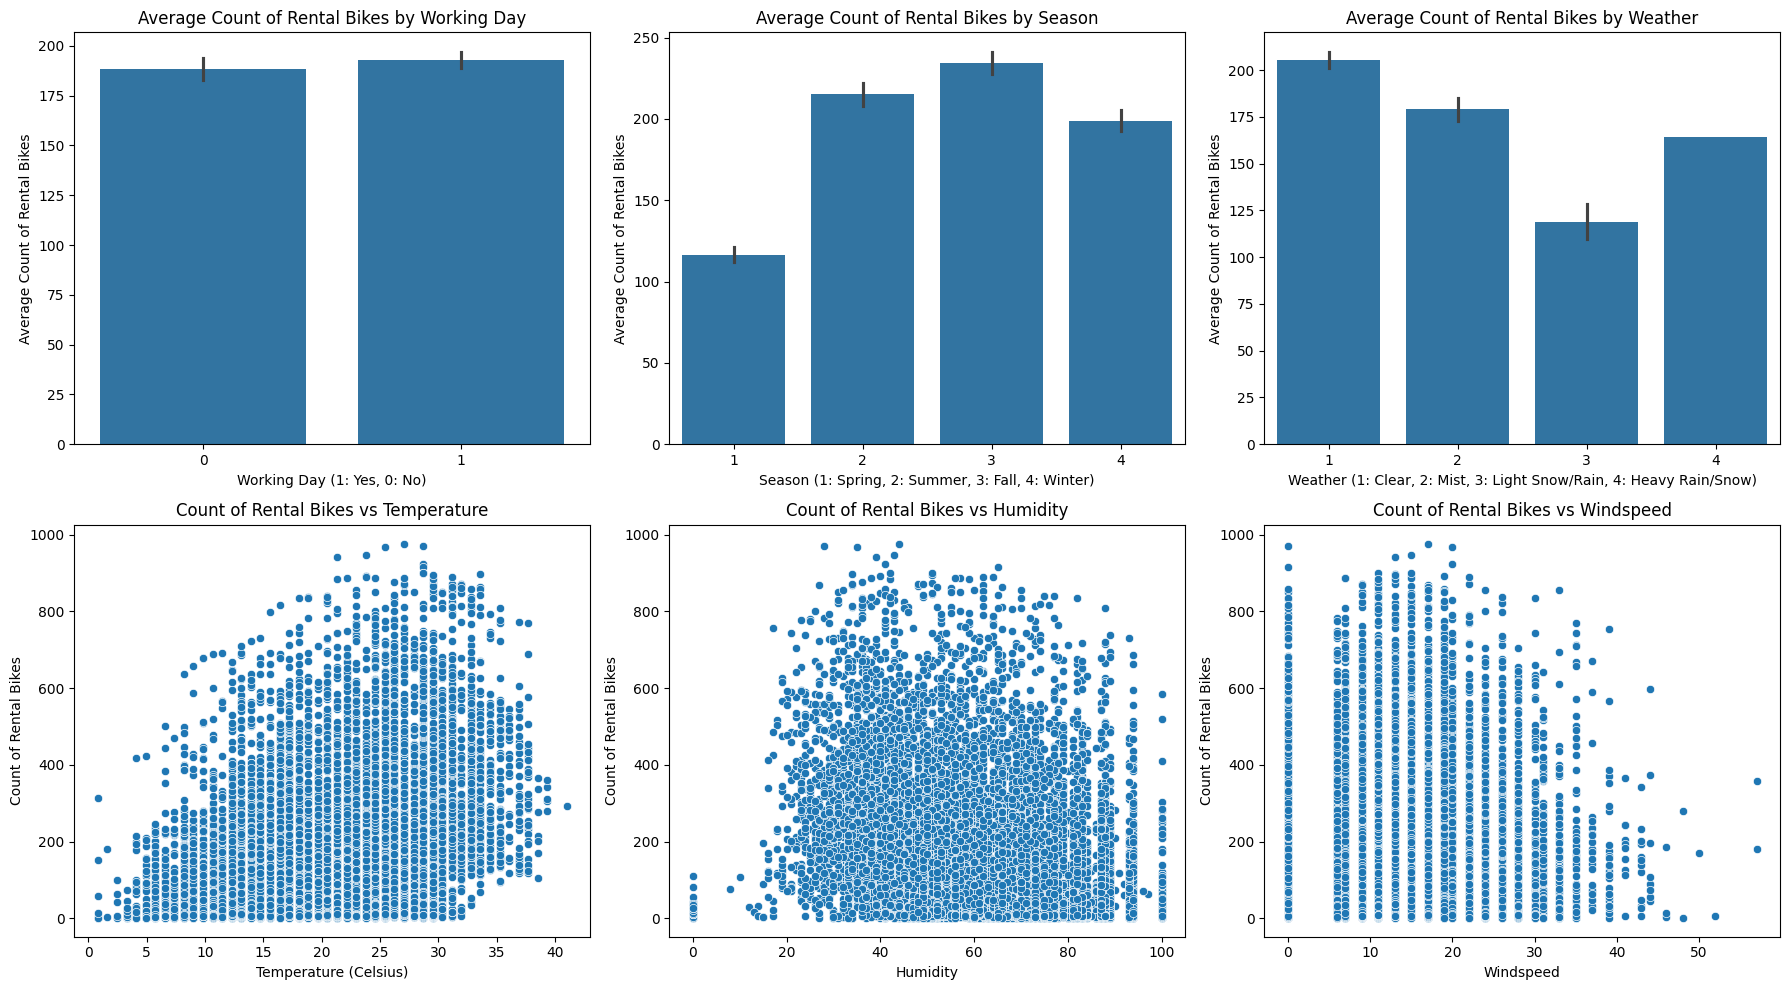

In [99]:
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Relationship between workingday and count
sns.barplot(x='workingday', y='count', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Average Count of Rental Bikes by Working Day')
axes[0, 0].set_xlabel('Working Day (1: Yes, 0: No)')
axes[0, 0].set_ylabel('Average Count of Rental Bikes')

# Relationship between season and count
sns.barplot(x='season', y='count', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Average Count of Rental Bikes by Season')
axes[0, 1].set_xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
axes[0, 1].set_ylabel('Average Count of Rental Bikes')

# Relationship between weather and count
sns.barplot(x='weather', y='count', data=data, ax=axes[0, 2])
axes[0, 2].set_title('Average Count of Rental Bikes by Weather')
axes[0, 2].set_xlabel('Weather (1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Rain/Snow)')
axes[0, 2].set_ylabel('Average Count of Rental Bikes')

# Relationship between temperature and count
sns.scatterplot(x='temp', y='count', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Count of Rental Bikes vs Temperature')
axes[1, 0].set_xlabel('Temperature (Celsius)')
axes[1, 0].set_ylabel('Count of Rental Bikes')

# Relationship between humidity and count
sns.scatterplot(x='humidity', y='count', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Count of Rental Bikes vs Humidity')
axes[1, 1].set_xlabel('Humidity')
axes[1, 1].set_ylabel('Count of Rental Bikes')

# Relationship between windspeed and count
sns.scatterplot(x='windspeed', y='count', data=data, ax=axes[1, 2])
axes[1, 2].set_title('Count of Rental Bikes vs Windspeed')
axes[1, 2].set_xlabel('Windspeed')
axes[1, 2].set_ylabel('Count of Rental Bikes')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


Working Day has an effect on the number of electric cycles rented:
Since we are comparing the mean number of cycles rented between two groups (working day vs. non-working day), a Two-Sample T-Test is appropriate.
This test will help determine if there is a statistically significant difference in the mean number of cycles rented between working and non-working days.

# Try establishing a Relationship between the Dependent and Independent Variables.
Hint:
i. Plot a Correlation Heatmap and draw insights.
ii. Remove the highly correlated variables, if any.

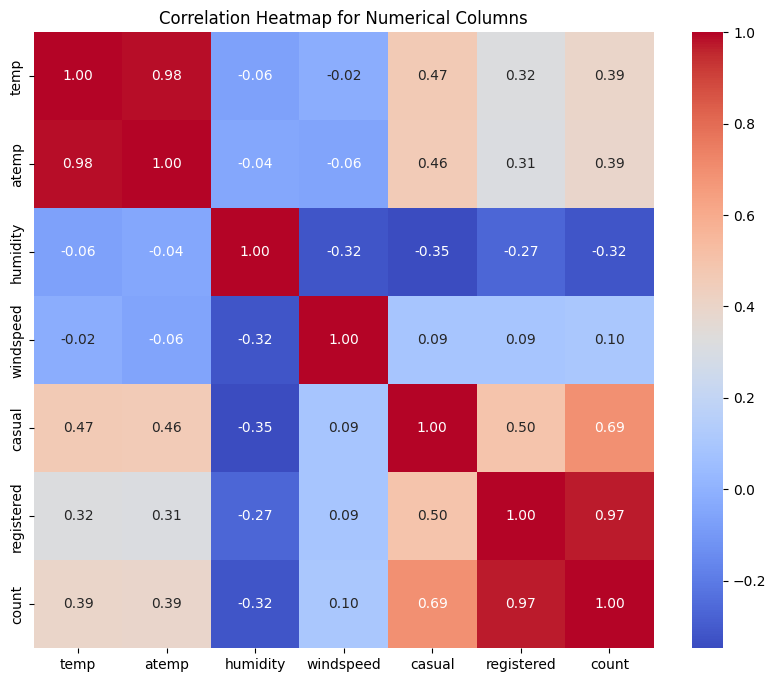

In [100]:
# Select numerical columns
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Compute correlation matrix
corr_numerical = data[numerical_cols].corr()

# Plot correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_numerical, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

In [101]:
# Remove highly correlated variables (threshold = 0.8)
high_corr_threshold = 0.8
upper = corr_numerical.where(np.triu(np.ones(corr_numerical.shape, dtype=bool), k=1))
to_drop = [column for column in upper.columns if any(upper[column].abs() > high_corr_threshold)]
print(to_drop)
# data = data.drop(columns=to_drop)

['atemp', 'count']


In [102]:
# Working Day has an effect on the number of electric cycles rented:
# Appropriate Test: Two-Sample T-Test
# Null Hypothesis (H0): The mean number of cycles rented on working days is equal to the mean number of cycles rented on non-working days.
# Alternate Hypothesis (H1): The mean number of cycles rented on working days is different from the mean number of cycles rented on non-working days.
# Assumptions: We assume that the number of cycles rented follows a normal distribution and that the variances of the two groups are equal.
# Significance Level (alpha): Typically set at 0.05.
# Decision: If the p-value is less than alpha, we reject the null hypothesis.

In [103]:
# Two-Sample T-Test for working day vs. count
workingday_yes = data[data['workingday'] == 1]['count']
workingday_no = data[data['workingday'] == 0]['count']

t_stat, p_value_ttest = ttest_ind(workingday_yes, workingday_no)
print("Two-Sample T-Test Results:")
print("t-statistic:", t_stat)
print("p-value:", p_value_ttest)

Two-Sample T-Test Results:
t-statistic: 1.2096277376026694
p-value: 0.22644804226361348


In [104]:
alpha = 0.05
if p_value_ttest < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean number of cycles rented between working and non-working days.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean number of cycles rented between working and non-working days.")


Fail to reject the null hypothesis: There is no significant difference in the mean number of cycles rented between working and non-working days.


Number of cycles rented similar or different in different seasons:
We have multiple groups (four seasons) and want to compare the means of cycle rentals among these groups.
Thus, an ANOVA (Analysis of Variance) test is suitable. ANOVA will help determine
if there are significant differences in the mean number of cycles rented across different seasons.

In [105]:
# Number of cycles rented similar or different in different seasons:
# Appropriate Test: ANOVA (Analysis of Variance)
# Null Hypothesis (H0): The mean number of cycles rented is the same across all seasons.
# Alternate Hypothesis (H1): The mean number of cycles rented differs across at least one season.
# Assumptions: We assume that the number of cycles rented follows a normal distribution within each group and that the variances are equal across groups.
# Significance Level (alpha): Typically set at 0.05.
# Decision: If the p-value is less than alpha, we reject the null hypothesis.

In [106]:
# 2. ANOVA for Season vs. Count
f_stat_season, p_value_anova_season = f_oneway(data[data['season'] == 1]['count'],
                                               data[data['season'] == 2]['count'],
                                               data[data['season'] == 3]['count'],
                                               data[data['season'] == 4]['count'])
print("\nANOVA Results for Season vs. Count:")
print("F-statistic:", f_stat_season)
print("p-value:", p_value_anova_season)


ANOVA Results for Season vs. Count:
F-statistic: 236.94671081032106
p-value: 6.164843386499654e-149


In [107]:
if p_value_anova_season < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean number of cycles rented across different seasons.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean number of cycles rented across different seasons.")


Reject the null hypothesis: There is a significant difference in the mean number of cycles rented across different seasons.


Number of cycles rented similar or different in different weather:
Similar to the previous scenario, we have multiple groups (four weather conditions) and want to compare the means of cycle rentals among these groups.
Hence, we can again use ANOVA to test if there are significant differences in the mean number of cycles rented across different weather conditions.

In [108]:
# Number of cycles rented similar or different in different weather:
# Appropriate Test: ANOVA (Analysis of Variance)
# Null Hypothesis (H0): The mean number of cycles rented is the same across all weather conditions.
# Alternate Hypothesis (H1): The mean number of cycles rented differs across at least one weather condition.
# Assumptions: We assume that the number of cycles rented follows a normal distribution within each group and that the variances are equal across groups.
# Significance Level (alpha): Typically set at 0.05.
# Decision: If the p-value is less than alpha, we reject the null hypothesis.

In [109]:
# 3. ANOVA for Weather vs. Count
f_stat_weather, p_value_anova_weather = f_oneway(data[data['weather'] == 1]['count'],
                                                 data[data['weather'] == 2]['count'],
                                                 data[data['weather'] == 3]['count'],
                                                 data[data['weather'] == 4]['count'])
print("\nANOVA Results for Weather vs. Count:")
print("F-statistic:", f_stat_weather)
print("p-value:", p_value_anova_weather)


ANOVA Results for Weather vs. Count:
F-statistic: 65.53024112793271
p-value: 5.482069475935669e-42


In [110]:
if p_value_anova_weather < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean number of cycles rented across different weather conditions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean number of cycles rented across different weather conditions.")


Reject the null hypothesis: There is a significant difference in the mean number of cycles rented across different weather conditions.


Weather is dependent on season (check between two categorical variables):
Here, we are analyzing the association between two categorical variables (weather and season) to see if they are dependent on each other. For this scenario, a Chi-square test of independence is appropriate. This test will help determine if there is a statistically significant association between weather and season.

In [111]:
# Weather is dependent on season (check between two categorical variables):
# Appropriate Test: Chi-square Test of Independence
# Null Hypothesis (H0): Weather and season are independent (no association).
# Alternate Hypothesis (H1): Weather and season are dependent (there is an association).
# Assumptions: We assume that the observations are independent and that the expected frequency count for each cell in the contingency table is at least 5.
# Significance Level (alpha): Typically set at 0.05.
# Decision: If the p-value is less than alpha, we reject the null hypothesis.

In [112]:
# Chi-square test for weather vs. season
weather_season_table = pd.crosstab(data['weather'], data['season'])
chi2, p_value_chi2, _, _ = chi2_contingency(weather_season_table)
print("\nChi-square Test Results for Weather vs. Season:")
print("Chi-square statistic:", chi2)
print("p-value:", p_value_chi2)


Chi-square Test Results for Weather vs. Season:
Chi-square statistic: 49.15865559689363
p-value: 1.5499250736864862e-07


In [113]:
if p_value_chi2 < alpha:
    print("Reject the null hypothesis: Weather and season are dependent.")
else:
    print("Fail to reject the null hypothesis: Weather and season are independent.")

Reject the null hypothesis: Weather and season are dependent.


# Check assumptions

In [114]:
# 2. Equal variance (Homoscedasticity)
# Levene's test for equal variance
levene_test =  levene(data['count'][data['workingday'] == 1],
                      data['count'][data['workingday'] == 0],
                      data['count'][data['weather'] == 1],
                      data['count'][data['weather'] == 2],
                      data['count'][data['weather'] == 3],
                      data['count'][data['weather'] == 4],
                      data['count'][data['season'] == 1],
                      data['count'][data['season'] == 2],
                      data['count'][data['season'] == 3],
                      data['count'][data['season'] == 4])
p_value = levene_test[1]
print("\nLevene's Test for Equal Variance:")
print("Test Statistic:", levene_test[0])
print("p-value:", levene_test[1])


Levene's Test for Equal Variance:
Test Statistic: 78.05589801557264
p-value: 7.720397707466148e-144


In [115]:
if p_value < 0.05:
  print("Reject H0")
else:
  print("Fail to reject H0")

Reject H0


In [116]:
# Fit OLS regression model
model = ols('count ~ C(weather) * C(season)', data=data).fit()

# Generate ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                            sum_sq       df           F         PR(>F)
C(weather)            9.034678e+06      3.0   99.622113   1.337521e-43
C(season)             2.519275e+07      3.0  277.791271  2.177371e-118
C(weather):C(season)  8.382528e+05      9.0    3.081036   5.150817e-03
Residual              3.286889e+08  10873.0         NaN            NaN


In [117]:
# Fit OLS regression model
model = ols('count ~ C(weather) * C(season) * C(workingday)', data=data).fit()

# Generate ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                          sum_sq       df           F  \
C(weather)                          1.158650e+06      3.0   12.787497   
C(season)                           1.486492e+07      3.0  164.057441   
C(workingday)                                NaN      1.0         NaN   
C(weather):C(season)                7.845130e+05      9.0    2.886105   
C(weather):C(workingday)            1.577848e+05      3.0    1.741400   
C(season):C(workingday)             2.020975e+05      3.0    2.230459   
C(weather):C(season):C(workingday)  3.859605e+05      9.0    1.419891   
Residual                            3.280313e+08  10861.0         NaN   

                                          PR(>F)  
C(weather)                          2.837848e-06  
C(season)                           6.394341e-71  
C(workingday)                                NaN  
C(weather):C(season)                8.221968e-03  
C(weather):C(workingday)            1.753238e-01  
C(season):C(workingday)             

In [118]:
alpha = 0.05
# Decision to accept or reject null hypothesis
if any(anova_table['PR(>F)'] < alpha):
    print("\nReject the null hypothesis: There is a significant relationship between at least one of the independent variables and the dependent variable.")
else:
    print("\nFail to reject the null hypothesis: There is no significant relationship between the independent variables and the dependent variable.")



Reject the null hypothesis: There is a significant relationship between at least one of the independent variables and the dependent variable.



Shapiro-Wilk Test for Normality:
Test Statistic: 0.9207524061203003
p-value: 0.0


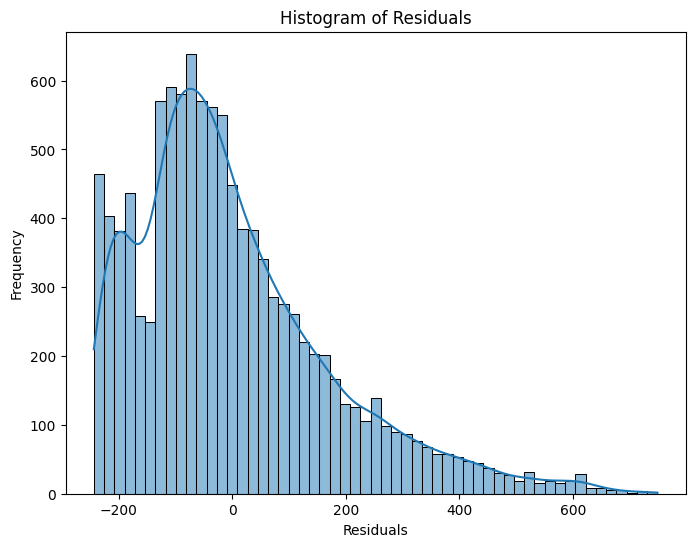

<Figure size 800x600 with 0 Axes>

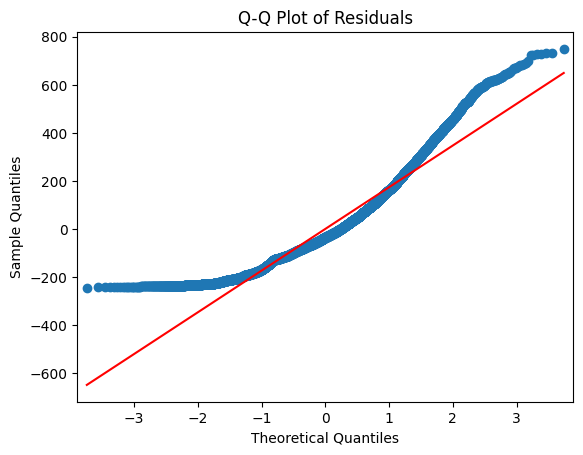

In [119]:
# Assumption checks
# 1. Normality of residuals
residuals = model.resid
# Shapiro-Wilk test for normality
shapiro_test = shapiro(residuals)
print("\nShapiro-Wilk Test for Normality:")
print("Test Statistic:", shapiro_test[0])
print("p-value:", shapiro_test[1])

# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Q-Q plot of residuals
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()